In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
with open('c10p1.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['c10p1'])

In [12]:
X = data['c10p1'].T[0]
Y = data['c10p1'].T[1]

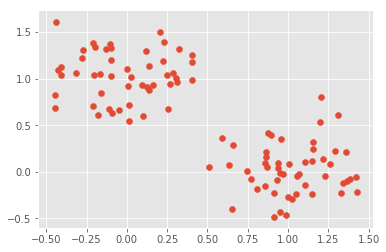

In [13]:
plt.scatter(X, Y);

In [14]:
# Perform centering
X -= np.mean(X)
Y -= np.mean(Y)

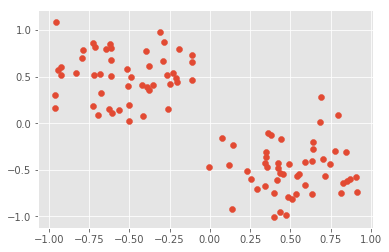

In [16]:
plt.scatter(X, Y);

In [37]:
def update(eta, w, dt, v, u, alpha, n_iter):
    """
    Performs Oja's discrete update rule.
    """
    w0 = w[:]
    w_trace = []
    
    for i in range(n_iter):
        w0 += eta * dt * (v * u[i % len(u)] - alpha * v ** 2 * w)
        w_trace.append(w0)
    
    return w0, np.array(w_trace)

In [170]:
w = np.random.randn(2)

In [171]:
w

array([ 0.28061897, -1.89921945])

In [172]:
eta = 1
alpha = 1
dt = 0.01

In [173]:
w_final, trace = update(eta, w, dt, 1, data['c10p1'], alpha, 100000)

In [174]:
w_final

array([-0.12939269,  0.13011768])

In [54]:
trace.shape

(100000, 2)

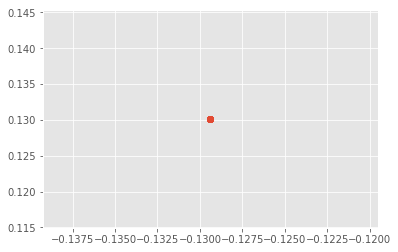

In [55]:
plt.scatter(trace.T[0], trace.T[1])

In [155]:
# Correlation matrix
d = data['c10p1']
Q = np.dot(d.T, d) / len(d)

In [156]:
Q

array([[ 0.32640954, -0.25904608],
       [-0.25904608,  0.32166565]])

In [157]:
lambd, e = np.linalg.eig(Q)

In [158]:
e

array([[ 0.71033657,  0.70386217],
       [-0.70386217,  0.71033657]])

In [159]:
lambd

array([0.58309453, 0.06498065])